In [20]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.colors as mcolors
import glob

In [23]:
drifter = xr.open_dataset('/data/whale-drift/observations/drifters/Carthe04695637_20240423_20240428.nc')
drifter

<xarray.Dataset> Size: 6kB
Dimensions:    (TIME: 191)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2kB 2024-04-23T15:58:30.000002048 ... 20...
Data variables:
    LONGITUDE  (TIME) float64 2kB ...
    LATITUDE   (TIME) float64 2kB ...
    ATSEA      (TIME) float64 2kB ...
Attributes: (12/39)
    buoyid:                           Carthe04695637
    ID:                               Carthe 0-4695637
    track_number:                     1
    IMEI:                             NaN
    wmoid:                            
    type:                             Carthe
    ...                               ...
    lon_max:                          -63.354442000000006
    atSea_min:                        1.0
    atSea_max:                        1.0
    data_description:                 Drifter data in netCDF file format crea...
    raw_data_file:                    Carthe_drifter-05_10_24-07_06.csv
    qc_comment:                       The data in this file has been processe...

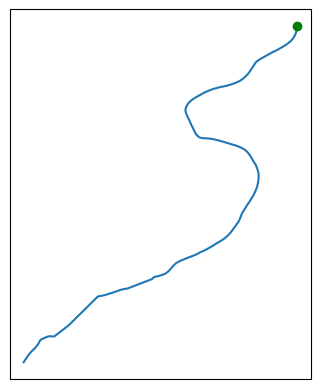

In [18]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(drifter.LONGITUDE, drifter.LATITUDE, transform=ccrs.PlateCarree())
ax.plot(drifter.LONGITUDE.values[0], drifter.LATITUDE.values[0], 'go', transform=ccrs.PlateCarree())

In [30]:
data_dir=f'/data/whale-drift/ciopse-hrdps'

strike_lon = -63.0617
strike_lat =  44.625
strike_date = datetime.datetime(2024,4,18) # 11:20am - not sure time zone

# Where sighting occured
sight_lon = -65.05138889
sight_lat = 42.19694444
sight_date = datetime.datetime(2024, 5, 13) #sighting on May 2 but not sure what time so project to May 13

starts = [strike_date + datetime.timedelta(hours=h) for h in np.arange(0.0, 25.0)]

n_lines = 6
cmap = mpl.colormaps['plasma']
windages = np.arange(0.00, 0.06, 0.01)
colors = cmap(np.linspace(0, 1, n_lines))
colour_mapping = {'{:.2f}'.format(w): c for w,c in zip(windages, colors)}
windages_str = ['0.0', '0.01', '0.02', '0.03', '0.04', '0.05']

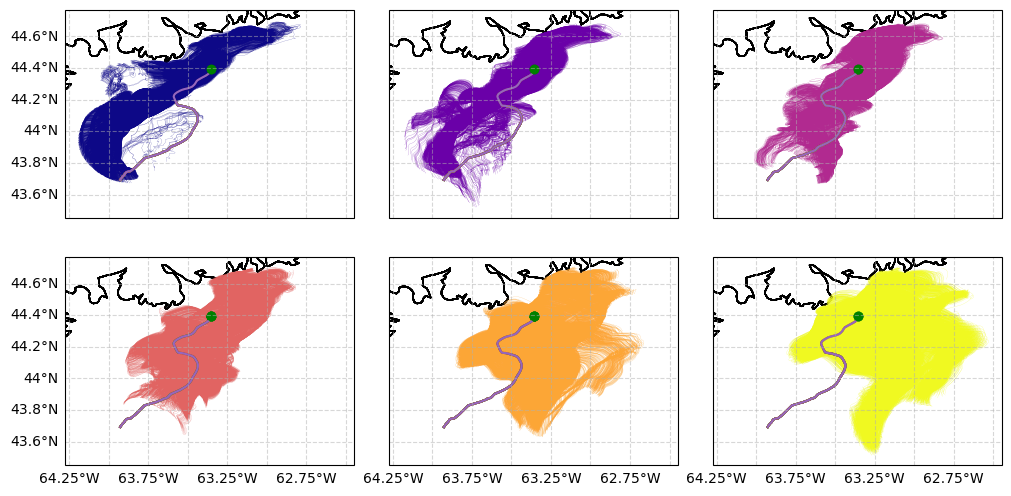

In [38]:
drift='forward'

fig, axs = plt.subplots(2,3,subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(10,5),
                            sharex=True, sharey=True, constrained_layout=True)

for s in starts:
    sd = s.strftime("%Y%m%d%H")
    for windage, ax in zip(windages_str, axs.flatten()):
        files = glob.glob(f'{data_dir}/*{sd}*{drift}*wind{windage}.nc')
        d = xr.open_dataset(files[0])
        dsel = d.sel(time=slice(drifter.TIME.values[0], drifter.TIME.values[-1]))
        dp=dsel.where((dsel.lon<360) | (dsel.lat<360), np.nan)
        for t in dp.trajectory.values:
            dp_t = dp.sel(trajectory=t)
            lons = np.ma.masked_invalid(dp_t.lon.values)
            lats = np.ma.masked_invalid(dp_t.lat.values)
            ax.plot(lons[~lons.mask], lats[~lats.mask], color=colour_mapping['{:.2f}'.format(float(windage))], 
                    lw=0.1,transform=ccrs.PlateCarree())
        ax.plot(drifter.LONGITUDE, drifter.LATITUDE, transform=ccrs.PlateCarree())
        ax.plot(drifter.LONGITUDE.values[0], drifter.LATITUDE.values[0], 'go', transform=ccrs.PlateCarree())
        ax.coastlines()

axs[1,0].gridlines(draw_labels=['bottom', 'left'],linestyle='--',alpha=0.5)
axs[0,0].gridlines(draw_labels=[ 'left'],linestyle='--',alpha=0.5)
axs[1,1].gridlines(draw_labels=['bottom'],linestyle='--',alpha=0.5)
axs[1,2].gridlines(draw_labels=['bottom'],linestyle='--',alpha=0.5)
axs[0,1].gridlines(linestyle='--',alpha=0.5)
axs[0,2].gridlines(linestyle='--',alpha=0.5)

On April 23, drifter was further downstream than the whale release particles - it would be better to do a drift eval on this drifter, and drift correction factor. 

However, the general direction of the tracks is consistent - at model is at least moving in the same direciton as this drifter.